Thermal Expansion for BB84 H gate for 1 - 2nd November 2021

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_armonk')
backend.properties()

In [2]:
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import pauli_error

from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
#import matplotlib.pyplot as plt

def make_noise_therm(p_m,p_g):

    T1 = 142370 # in nano second, basically 54 micro second
    T2 = 209610 # in nano second, basically 44 micro second

    # Gate operation time in nano second
    time_h = 71.11
    time_x = 71.11
    time_id = 71.11
    time_measure = 4977.778

    # probability of bit flip error after each gate

    error_measure = thermal_relaxation_error(T1,T2,time_measure)
    error_m = pauli_error([('X',p_m),('I',1-p_m)])
    
    error_gate1 = thermal_relaxation_error(T1,T2,time_x)
    error_bit1 = depolarizing_error(p_g,1)
    error_bit2 = error_bit1.tensor(error_bit1)

    noise_model = noise.NoiseModel()

    noise_model.add_all_qubit_quantum_error(error_measure, "measure")
    noise_model.add_all_qubit_quantum_error(error_m, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate1, "relaxation single gate")
    noise_model.add_all_qubit_quantum_error(error_bit1, ["h","x","id"])
    
    return noise_model

In [6]:
from qiskit.tools.monitor import backend_monitor
from qiskit import *
from qiskit.visualization import plot_histogram
from random import randrange, seed, sample
from sys import argv, exit
import random
y_list=[]
#data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
for z in range(20):
    data=100
    ##########################################################################
    h=1
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    print(digits)
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    print('\n')
    #n = len(digits)
    
    ##########################################################################
    bob_bits=[]
    from random import choice
    m=0
    n=100
    for i in range(n):
        m=m+10
        #print("No of identity Gate:",m)
        if digits[i] == 1:
            q = QuantumRegister(1, 'q')
            c = ClassicalRegister(1, 'c')
            qc = QuantumCircuit(q, c)
            qc.x(0)
            qc.barrier()
            qc.h(0)
            qc.barrier()
            for j in range(m):
                qc.id(0)
                qc.barrier()
            qc.h(0)
            qc.barrier()
            qc.measure(q[0], c[0])
            #print(qc)
            # Perform a noise simulation
            backend = Aer.get_backend('qasm_simulator')
            counts = backend.run(qc,Aer.get_backend('qasm_simulator'),shots=8192,noise_model=make_noise_therm(0.034,0.0003521)).result().get_counts()
            #counts = result.get_counts(qc)
            %matplotlib inline
            #print(qc)
            #qc.draw(output='mpl')
            #plt.show()
            #print(counts)
            #plot_histogram(counts)
            
            itemMaxValue = max(counts.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            # Iterate over all the items in dictionary to find keys with max value
            for key, value in counts.items():
                if value == itemMaxValue[1]:
                    bob_bits.append(value/8192)
    y_list.append(bob_bits)
    print(bob_bits)
    print("")
print(y_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]




[0.9320068359375, 0.9315185546875, 0.93115234375, 0.9288330078125, 0.9248046875, 0.927001953125, 0.9183349609375, 0.9190673828125, 0.91943359375, 0.916259765625, 0.916259765625, 0.9234619140625, 0.9090576171875, 0.9140625, 0.90478515625, 0.910400390625, 0.9122314453125, 0.902099609375, 0.90869140625, 0.897705078125, 0.899658203125, 0.9031982421875, 0.901611328125, 0.896240234375, 0.89697265625, 0.8968505859375, 0.8907470703125, 0.88916015625, 0.8912353515625, 0.886962890625, 0.884765625, 0.887939453125, 0.8818359375, 0.8746337890625, 0.8858642578125, 0.8826904296875, 0.87939453125, 0.871826171875, 0.8717041015625, 0.884765625, 0.87158203125, 0.8736572265625, 0.8653564453125, 0.8740234375, 0.8782958984375, 0.86767578125, 0.8604736328125, 0.86181640625, 0.860595703125, 0.8594970703125, 0.86767578125, 0.8614501953125, 0.86083984375, 0.864990234375, 0.8612060546875, 0.8431396484375, 0.8546142578125, 0.852783203125, 0.853759765625, 0.8529052734375, 0.84912109375, 0.846435546875, 0.846679687

[0.9326171875, 0.932373046875, 0.9306640625, 0.9312744140625, 0.92626953125, 0.921142578125, 0.9224853515625, 0.924072265625, 0.920166015625, 0.919677734375, 0.9169921875, 0.91943359375, 0.912841796875, 0.91357421875, 0.914306640625, 0.9080810546875, 0.9075927734375, 0.9019775390625, 0.8980712890625, 0.9039306640625, 0.9073486328125, 0.9010009765625, 0.902587890625, 0.8980712890625, 0.8958740234375, 0.901611328125, 0.899169921875, 0.888671875, 0.8890380859375, 0.889404296875, 0.88037109375, 0.8829345703125, 0.8843994140625, 0.8841552734375, 0.880615234375, 0.8843994140625, 0.8834228515625, 0.883056640625, 0.87548828125, 0.87255859375, 0.869384765625, 0.8656005859375, 0.866943359375, 0.8697509765625, 0.8707275390625, 0.865478515625, 0.86669921875, 0.8616943359375, 0.8646240234375, 0.859375, 0.8560791015625, 0.858154296875, 0.8599853515625, 0.857177734375, 0.8604736328125, 0.8511962890625, 0.8519287109375, 0.8458251953125, 0.841796875, 0.853515625, 0.8525390625, 0.8514404296875, 0.842773

[0.9366455078125, 0.929443359375, 0.929443359375, 0.9287109375, 0.9296875, 0.9219970703125, 0.926025390625, 0.9180908203125, 0.9173583984375, 0.9202880859375, 0.91796875, 0.918212890625, 0.914306640625, 0.90771484375, 0.911865234375, 0.90478515625, 0.9102783203125, 0.91064453125, 0.903076171875, 0.898193359375, 0.9041748046875, 0.8980712890625, 0.908203125, 0.8929443359375, 0.8997802734375, 0.890625, 0.8876953125, 0.8875732421875, 0.8919677734375, 0.8829345703125, 0.8857421875, 0.8880615234375, 0.883056640625, 0.88623046875, 0.88037109375, 0.885009765625, 0.88330078125, 0.8804931640625, 0.8759765625, 0.876953125, 0.87451171875, 0.86474609375, 0.8690185546875, 0.8701171875, 0.86962890625, 0.864013671875, 0.8653564453125, 0.864990234375, 0.861572265625, 0.860107421875, 0.8603515625, 0.8663330078125, 0.8612060546875, 0.8585205078125, 0.8577880859375, 0.8486328125, 0.852783203125, 0.8406982421875, 0.8516845703125, 0.849853515625, 0.84375, 0.8428955078125, 0.8424072265625, 0.8349609375, 0.8

[0.9310302734375, 0.92919921875, 0.933837890625, 0.9246826171875, 0.9244384765625, 0.9254150390625, 0.920166015625, 0.92333984375, 0.922119140625, 0.919921875, 0.9178466796875, 0.91357421875, 0.9132080078125, 0.9129638671875, 0.9097900390625, 0.909912109375, 0.90673828125, 0.905517578125, 0.908203125, 0.900146484375, 0.8924560546875, 0.8966064453125, 0.9022216796875, 0.8968505859375, 0.892822265625, 0.89794921875, 0.8927001953125, 0.884765625, 0.887939453125, 0.886962890625, 0.8895263671875, 0.88330078125, 0.880859375, 0.8804931640625, 0.8829345703125, 0.8746337890625, 0.873291015625, 0.877685546875, 0.879150390625, 0.873046875, 0.876220703125, 0.8731689453125, 0.8707275390625, 0.8692626953125, 0.8682861328125, 0.868408203125, 0.8682861328125, 0.8656005859375, 0.86181640625, 0.8623046875, 0.853271484375, 0.8564453125, 0.864501953125, 0.8497314453125, 0.8572998046875, 0.8565673828125, 0.8516845703125, 0.8453369140625, 0.8426513671875, 0.8465576171875, 0.849853515625, 0.851806640625, 0.8

[0.93701171875, 0.9296875, 0.930419921875, 0.92529296875, 0.92333984375, 0.9227294921875, 0.92333984375, 0.91845703125, 0.9169921875, 0.9195556640625, 0.91552734375, 0.917236328125, 0.90869140625, 0.9141845703125, 0.910888671875, 0.901123046875, 0.9073486328125, 0.9075927734375, 0.908203125, 0.8978271484375, 0.897705078125, 0.9002685546875, 0.8995361328125, 0.897216796875, 0.8948974609375, 0.8935546875, 0.889404296875, 0.8944091796875, 0.8802490234375, 0.8917236328125, 0.8922119140625, 0.8839111328125, 0.8841552734375, 0.884765625, 0.8841552734375, 0.879638671875, 0.8765869140625, 0.87109375, 0.86865234375, 0.8795166015625, 0.8741455078125, 0.87939453125, 0.8719482421875, 0.871337890625, 0.8668212890625, 0.8671875, 0.864990234375, 0.8631591796875, 0.86083984375, 0.8624267578125, 0.8631591796875, 0.857177734375, 0.857666015625, 0.856201171875, 0.8582763671875, 0.849365234375, 0.852783203125, 0.8436279296875, 0.8516845703125, 0.8482666015625, 0.8414306640625, 0.8499755859375, 0.842163085

[0.9356689453125, 0.9312744140625, 0.92333984375, 0.9276123046875, 0.9195556640625, 0.9346923828125, 0.920166015625, 0.925537109375, 0.924560546875, 0.919189453125, 0.916259765625, 0.919677734375, 0.91357421875, 0.9136962890625, 0.913330078125, 0.907958984375, 0.9102783203125, 0.9134521484375, 0.89794921875, 0.9034423828125, 0.8985595703125, 0.8966064453125, 0.89404296875, 0.8948974609375, 0.8953857421875, 0.89501953125, 0.8883056640625, 0.88623046875, 0.8876953125, 0.893310546875, 0.887451171875, 0.8826904296875, 0.88330078125, 0.8857421875, 0.88134765625, 0.88232421875, 0.88671875, 0.8822021484375, 0.872314453125, 0.87841796875, 0.870849609375, 0.8717041015625, 0.87451171875, 0.8714599609375, 0.8671875, 0.862060546875, 0.8614501953125, 0.864990234375, 0.858154296875, 0.856201171875, 0.8604736328125, 0.8525390625, 0.8577880859375, 0.85302734375, 0.8529052734375, 0.844970703125, 0.8538818359375, 0.8458251953125, 0.854736328125, 0.8486328125, 0.8447265625, 0.8477783203125, 0.84130859375

[0.9298095703125, 0.9283447265625, 0.9276123046875, 0.923828125, 0.9241943359375, 0.92529296875, 0.920166015625, 0.9215087890625, 0.9217529296875, 0.9095458984375, 0.9171142578125, 0.913330078125, 0.9124755859375, 0.9110107421875, 0.91455078125, 0.91357421875, 0.9134521484375, 0.9129638671875, 0.9029541015625, 0.8968505859375, 0.9051513671875, 0.8968505859375, 0.8995361328125, 0.8985595703125, 0.8963623046875, 0.8988037109375, 0.892333984375, 0.8914794921875, 0.888671875, 0.8880615234375, 0.88427734375, 0.88671875, 0.8836669921875, 0.880859375, 0.879638671875, 0.8775634765625, 0.8826904296875, 0.8751220703125, 0.88330078125, 0.8782958984375, 0.8751220703125, 0.8675537109375, 0.873291015625, 0.87255859375, 0.8690185546875, 0.8663330078125, 0.8612060546875, 0.861328125, 0.86083984375, 0.857421875, 0.8614501953125, 0.8575439453125, 0.8572998046875, 0.85986328125, 0.854248046875, 0.8564453125, 0.848876953125, 0.84912109375, 0.8453369140625, 0.8466796875, 0.84521484375, 0.8455810546875, 0.8

[0.9310302734375, 0.9364013671875, 0.9298095703125, 0.9251708984375, 0.920166015625, 0.924560546875, 0.92529296875, 0.919189453125, 0.9229736328125, 0.9156494140625, 0.9163818359375, 0.9193115234375, 0.919677734375, 0.911865234375, 0.912109375, 0.906005859375, 0.90869140625, 0.90478515625, 0.8997802734375, 0.9027099609375, 0.8980712890625, 0.8994140625, 0.8963623046875, 0.897216796875, 0.8951416015625, 0.898193359375, 0.8912353515625, 0.886474609375, 0.892822265625, 0.884033203125, 0.8851318359375, 0.8818359375, 0.8802490234375, 0.8843994140625, 0.880615234375, 0.8729248046875, 0.884765625, 0.8701171875, 0.8780517578125, 0.8743896484375, 0.877197265625, 0.86865234375, 0.8765869140625, 0.8704833984375, 0.8681640625, 0.860107421875, 0.8531494140625, 0.868896484375, 0.86962890625, 0.8643798828125, 0.865478515625, 0.8629150390625, 0.8568115234375, 0.8572998046875, 0.859130859375, 0.8553466796875, 0.8558349609375, 0.8536376953125, 0.845947265625, 0.843505859375, 0.84765625, 0.8448486328125,

[0.93408203125, 0.9290771484375, 0.931884765625, 0.9315185546875, 0.9261474609375, 0.9244384765625, 0.9249267578125, 0.9234619140625, 0.924560546875, 0.9166259765625, 0.9132080078125, 0.915283203125, 0.917236328125, 0.90576171875, 0.909423828125, 0.907470703125, 0.911865234375, 0.9097900390625, 0.904296875, 0.90087890625, 0.9056396484375, 0.897216796875, 0.900634765625, 0.9012451171875, 0.8974609375, 0.8955078125, 0.891845703125, 0.89111328125, 0.884033203125, 0.885009765625, 0.8887939453125, 0.8848876953125, 0.8856201171875, 0.8875732421875, 0.8809814453125, 0.875244140625, 0.88037109375, 0.8814697265625, 0.87890625, 0.872802734375, 0.8697509765625, 0.8763427734375, 0.86962890625, 0.8643798828125, 0.8668212890625, 0.86181640625, 0.8665771484375, 0.8631591796875, 0.863037109375, 0.858642578125, 0.855224609375, 0.8594970703125, 0.859619140625, 0.8590087890625, 0.8553466796875, 0.850830078125, 0.852294921875, 0.8475341796875, 0.8511962890625, 0.84619140625, 0.8402099609375, 0.85607910156

[0.933349609375, 0.9281005859375, 0.9359130859375, 0.92724609375, 0.9251708984375, 0.9251708984375, 0.9246826171875, 0.922119140625, 0.9197998046875, 0.9136962890625, 0.9112548828125, 0.9166259765625, 0.906982421875, 0.9088134765625, 0.910888671875, 0.907470703125, 0.907958984375, 0.9097900390625, 0.9022216796875, 0.8985595703125, 0.8990478515625, 0.8939208984375, 0.9014892578125, 0.89697265625, 0.8917236328125, 0.898193359375, 0.8970947265625, 0.8873291015625, 0.8895263671875, 0.89111328125, 0.87939453125, 0.881103515625, 0.8790283203125, 0.88671875, 0.8795166015625, 0.87841796875, 0.8753662109375, 0.8770751953125, 0.86865234375, 0.8746337890625, 0.8712158203125, 0.8765869140625, 0.8724365234375, 0.864013671875, 0.871826171875, 0.87060546875, 0.8653564453125, 0.8580322265625, 0.85693359375, 0.854736328125, 0.859130859375, 0.85791015625, 0.8582763671875, 0.8551025390625, 0.8515625, 0.85400390625, 0.85205078125, 0.852294921875, 0.8438720703125, 0.84521484375, 0.8443603515625, 0.83923339

[0.9332275390625, 0.924560546875, 0.931396484375, 0.9283447265625, 0.928955078125, 0.9224853515625, 0.924560546875, 0.9241943359375, 0.918701171875, 0.9197998046875, 0.912841796875, 0.9139404296875, 0.912353515625, 0.9080810546875, 0.9102783203125, 0.90625, 0.9078369140625, 0.9046630859375, 0.905517578125, 0.9012451171875, 0.897705078125, 0.9044189453125, 0.9014892578125, 0.891845703125, 0.896728515625, 0.889404296875, 0.8887939453125, 0.89501953125, 0.889892578125, 0.8828125, 0.885986328125, 0.881591796875, 0.8831787109375, 0.8819580078125, 0.884765625, 0.8883056640625, 0.882568359375, 0.87890625, 0.873291015625, 0.873779296875, 0.8712158203125, 0.869140625, 0.8720703125, 0.874267578125, 0.8692626953125, 0.86376953125, 0.8631591796875, 0.862060546875, 0.8651123046875, 0.8533935546875, 0.857177734375, 0.857177734375, 0.85888671875, 0.854248046875, 0.85498046875, 0.85400390625, 0.8502197265625, 0.8480224609375, 0.850341796875, 0.85205078125, 0.8402099609375, 0.8475341796875, 0.844116210

[0.9310302734375, 0.9302978515625, 0.93115234375, 0.9197998046875, 0.923095703125, 0.924560546875, 0.9215087890625, 0.9219970703125, 0.9193115234375, 0.919189453125, 0.9091796875, 0.9173583984375, 0.91259765625, 0.910888671875, 0.9132080078125, 0.9129638671875, 0.9049072265625, 0.9058837890625, 0.903076171875, 0.9063720703125, 0.899658203125, 0.902099609375, 0.890869140625, 0.904052734375, 0.893310546875, 0.892822265625, 0.89599609375, 0.889892578125, 0.887939453125, 0.8780517578125, 0.883544921875, 0.8841552734375, 0.8775634765625, 0.8824462890625, 0.8798828125, 0.876953125, 0.874267578125, 0.875732421875, 0.8759765625, 0.87109375, 0.869873046875, 0.8704833984375, 0.869384765625, 0.8687744140625, 0.8687744140625, 0.867919921875, 0.8631591796875, 0.865478515625, 0.8623046875, 0.860107421875, 0.8572998046875, 0.8570556640625, 0.8619384765625, 0.855712890625, 0.8560791015625, 0.8548583984375, 0.8514404296875, 0.8525390625, 0.8470458984375, 0.8505859375, 0.8438720703125, 0.846435546875, 0

[0.92626953125, 0.9320068359375, 0.926513671875, 0.926513671875, 0.92431640625, 0.929443359375, 0.924560546875, 0.924072265625, 0.9195556640625, 0.91845703125, 0.912353515625, 0.91650390625, 0.909423828125, 0.9158935546875, 0.910400390625, 0.9063720703125, 0.9114990234375, 0.9088134765625, 0.9010009765625, 0.9052734375, 0.8994140625, 0.89453125, 0.90185546875, 0.898681640625, 0.8984375, 0.8936767578125, 0.8992919921875, 0.8927001953125, 0.889892578125, 0.8929443359375, 0.88671875, 0.8892822265625, 0.8876953125, 0.8763427734375, 0.8773193359375, 0.8858642578125, 0.8759765625, 0.8826904296875, 0.875732421875, 0.8736572265625, 0.8751220703125, 0.8662109375, 0.86865234375, 0.8648681640625, 0.8570556640625, 0.8662109375, 0.8634033203125, 0.861083984375, 0.863525390625, 0.857421875, 0.8642578125, 0.860107421875, 0.8636474609375, 0.85546875, 0.8570556640625, 0.8466796875, 0.849365234375, 0.8468017578125, 0.849365234375, 0.8424072265625, 0.8546142578125, 0.839599609375, 0.8450927734375, 0.8442

[0.927734375, 0.9288330078125, 0.9281005859375, 0.928955078125, 0.927734375, 0.923828125, 0.924072265625, 0.9228515625, 0.9173583984375, 0.9168701171875, 0.9127197265625, 0.9161376953125, 0.913330078125, 0.9088134765625, 0.908935546875, 0.9068603515625, 0.9117431640625, 0.90478515625, 0.9031982421875, 0.9053955078125, 0.9052734375, 0.896240234375, 0.89892578125, 0.895751953125, 0.8917236328125, 0.888916015625, 0.890869140625, 0.8944091796875, 0.8914794921875, 0.8798828125, 0.8929443359375, 0.885009765625, 0.88330078125, 0.887451171875, 0.8887939453125, 0.881591796875, 0.8868408203125, 0.8834228515625, 0.8797607421875, 0.8724365234375, 0.86767578125, 0.8677978515625, 0.8682861328125, 0.8687744140625, 0.870361328125, 0.868896484375, 0.8680419921875, 0.865478515625, 0.863525390625, 0.859130859375, 0.858642578125, 0.855224609375, 0.851806640625, 0.8582763671875, 0.8553466796875, 0.857421875, 0.85302734375, 0.852783203125, 0.8443603515625, 0.8446044921875, 0.846435546875, 0.8448486328125, 0

[0.930908203125, 0.9281005859375, 0.92529296875, 0.928955078125, 0.9215087890625, 0.9237060546875, 0.9200439453125, 0.921142578125, 0.92041015625, 0.9149169921875, 0.913330078125, 0.9212646484375, 0.91162109375, 0.9139404296875, 0.9080810546875, 0.910400390625, 0.9073486328125, 0.905029296875, 0.902099609375, 0.9033203125, 0.90380859375, 0.907958984375, 0.900390625, 0.8958740234375, 0.89453125, 0.8946533203125, 0.8814697265625, 0.8922119140625, 0.890380859375, 0.884521484375, 0.891357421875, 0.8856201171875, 0.8900146484375, 0.882568359375, 0.8753662109375, 0.88134765625, 0.8753662109375, 0.871826171875, 0.87451171875, 0.8739013671875, 0.87451171875, 0.869384765625, 0.87060546875, 0.86376953125, 0.8687744140625, 0.864990234375, 0.8634033203125, 0.8658447265625, 0.860595703125, 0.8609619140625, 0.865234375, 0.8529052734375, 0.85888671875, 0.8516845703125, 0.853759765625, 0.8544921875, 0.8515625, 0.849365234375, 0.84912109375, 0.8487548828125, 0.84521484375, 0.847412109375, 0.84460449218

[0.932861328125, 0.927490234375, 0.92822265625, 0.9305419921875, 0.9271240234375, 0.9259033203125, 0.9176025390625, 0.92041015625, 0.9178466796875, 0.914306640625, 0.9144287109375, 0.9161376953125, 0.910400390625, 0.90478515625, 0.9156494140625, 0.9041748046875, 0.90380859375, 0.9100341796875, 0.902587890625, 0.9044189453125, 0.90087890625, 0.9000244140625, 0.89892578125, 0.9000244140625, 0.895263671875, 0.8914794921875, 0.888427734375, 0.8946533203125, 0.8919677734375, 0.8870849609375, 0.8861083984375, 0.880126953125, 0.883056640625, 0.8831787109375, 0.882080078125, 0.875, 0.8851318359375, 0.8731689453125, 0.873291015625, 0.874267578125, 0.8760986328125, 0.8671875, 0.870849609375, 0.875, 0.866943359375, 0.865234375, 0.86572265625, 0.86181640625, 0.8616943359375, 0.857666015625, 0.8677978515625, 0.862060546875, 0.8570556640625, 0.8560791015625, 0.8563232421875, 0.8516845703125, 0.8468017578125, 0.8475341796875, 0.8548583984375, 0.8414306640625, 0.8468017578125, 0.8453369140625, 0.84204

[0.9326171875, 0.93359375, 0.9300537109375, 0.923828125, 0.9322509765625, 0.92578125, 0.922607421875, 0.9239501953125, 0.922607421875, 0.916748046875, 0.9088134765625, 0.9195556640625, 0.9107666015625, 0.9132080078125, 0.912109375, 0.91259765625, 0.9140625, 0.905029296875, 0.9007568359375, 0.9036865234375, 0.8970947265625, 0.8956298828125, 0.90283203125, 0.895751953125, 0.9000244140625, 0.8948974609375, 0.8909912109375, 0.881103515625, 0.89404296875, 0.887939453125, 0.880859375, 0.8843994140625, 0.8851318359375, 0.8870849609375, 0.8814697265625, 0.8795166015625, 0.8785400390625, 0.87744140625, 0.876708984375, 0.872802734375, 0.872314453125, 0.8756103515625, 0.8653564453125, 0.8685302734375, 0.8658447265625, 0.8658447265625, 0.8690185546875, 0.8653564453125, 0.8604736328125, 0.8599853515625, 0.8603515625, 0.856689453125, 0.85009765625, 0.8509521484375, 0.8524169921875, 0.849609375, 0.851806640625, 0.84765625, 0.8543701171875, 0.8392333984375, 0.844482421875, 0.8453369140625, 0.842163085

[0.9327392578125, 0.9327392578125, 0.931884765625, 0.9278564453125, 0.9283447265625, 0.9188232421875, 0.9224853515625, 0.91845703125, 0.919677734375, 0.92333984375, 0.9228515625, 0.9129638671875, 0.907470703125, 0.913818359375, 0.908447265625, 0.9105224609375, 0.9056396484375, 0.9110107421875, 0.905517578125, 0.896240234375, 0.904052734375, 0.89892578125, 0.9012451171875, 0.8958740234375, 0.8963623046875, 0.898681640625, 0.8934326171875, 0.8948974609375, 0.8927001953125, 0.891845703125, 0.8883056640625, 0.889404296875, 0.8836669921875, 0.8853759765625, 0.880859375, 0.8841552734375, 0.8790283203125, 0.8748779296875, 0.876708984375, 0.87158203125, 0.8739013671875, 0.871826171875, 0.8671875, 0.8660888671875, 0.861083984375, 0.8682861328125, 0.86962890625, 0.8662109375, 0.8599853515625, 0.8543701171875, 0.8577880859375, 0.8614501953125, 0.855224609375, 0.8619384765625, 0.853759765625, 0.844970703125, 0.852783203125, 0.850341796875, 0.8507080078125, 0.8482666015625, 0.8470458984375, 0.84387

[0.932861328125, 0.927001953125, 0.931884765625, 0.9317626953125, 0.9302978515625, 0.9268798828125, 0.9228515625, 0.9161376953125, 0.925537109375, 0.9200439453125, 0.9188232421875, 0.9122314453125, 0.908935546875, 0.906982421875, 0.916015625, 0.9061279296875, 0.9107666015625, 0.9046630859375, 0.89990234375, 0.9029541015625, 0.9012451171875, 0.904541015625, 0.8955078125, 0.893798828125, 0.8924560546875, 0.8876953125, 0.8880615234375, 0.890625, 0.887939453125, 0.885986328125, 0.8907470703125, 0.8853759765625, 0.8861083984375, 0.878662109375, 0.8873291015625, 0.8841552734375, 0.878173828125, 0.88232421875, 0.8837890625, 0.8759765625, 0.8748779296875, 0.8779296875, 0.8721923828125, 0.8677978515625, 0.868408203125, 0.8665771484375, 0.8702392578125, 0.8619384765625, 0.86767578125, 0.85693359375, 0.85888671875, 0.861572265625, 0.8590087890625, 0.8558349609375, 0.848876953125, 0.847900390625, 0.8509521484375, 0.8538818359375, 0.8408203125, 0.845947265625, 0.848876953125, 0.8485107421875, 0.840

[0.931884765625, 0.9295654296875, 0.9288330078125, 0.924072265625, 0.927001953125, 0.920166015625, 0.92138671875, 0.91845703125, 0.9156494140625, 0.9241943359375, 0.9119873046875, 0.9117431640625, 0.911376953125, 0.9139404296875, 0.910888671875, 0.9090576171875, 0.9029541015625, 0.9039306640625, 0.90283203125, 0.9039306640625, 0.9019775390625, 0.8973388671875, 0.90283203125, 0.89306640625, 0.902587890625, 0.892578125, 0.8961181640625, 0.8917236328125, 0.89208984375, 0.8905029296875, 0.8912353515625, 0.88330078125, 0.885009765625, 0.8839111328125, 0.8848876953125, 0.8734130859375, 0.881591796875, 0.878173828125, 0.8768310546875, 0.869873046875, 0.8765869140625, 0.870849609375, 0.87109375, 0.870361328125, 0.8719482421875, 0.8680419921875, 0.8685302734375, 0.8631591796875, 0.85986328125, 0.8590087890625, 0.8541259765625, 0.857421875, 0.85791015625, 0.8509521484375, 0.855712890625, 0.85009765625, 0.8538818359375, 0.85205078125, 0.844482421875, 0.8455810546875, 0.8541259765625, 0.8459472656

20 Times Average

In [7]:
from statistics import mean
y=y_list
print(*map(mean, zip(*y)))

0.932269287109375 0.92998046875 0.92987060546875 0.927239990234375 0.92572021484375 0.924700927734375 0.92236328125 0.92132568359375 0.920318603515625 0.917913818359375 0.91480712890625 0.91669921875 0.91181640625 0.911199951171875 0.911297607421875 0.90810546875 0.90885009765625 0.907122802734375 0.902996826171875 0.901654052734375 0.900946044921875 0.8992431640625 0.900054931640625 0.896746826171875 0.895892333984375 0.8945556640625 0.89169921875 0.89022216796875 0.8895751953125 0.887054443359375 0.886773681640625 0.88458251953125 0.883544921875 0.8832275390625 0.881939697265625 0.880157470703125 0.880169677734375 0.877435302734375 0.87593994140625 0.874737548828125 0.87310791015625 0.87119140625 0.870306396484375 0.869281005859375 0.86826171875 0.865972900390625 0.864892578125 0.863604736328125 0.862139892578125 0.85870361328125 0.86019287109375 0.85858154296875 0.8584228515625 0.856103515625 0.85562744140625 0.85111083984375 0.8519287109375 0.848883056640625 0.848406982421875 0.847

Map Plotting

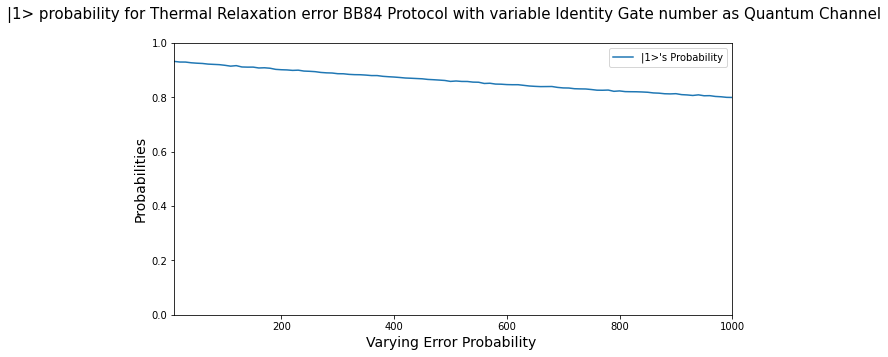

<Figure size 576x360 with 0 Axes>

In [8]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|1> probability for Thermal Relaxation error BB84 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1=[0.932269287109375, 0.92998046875, 0.92987060546875, 0.927239990234375, 0.92572021484375, 0.924700927734375, 0.92236328125, 0.92132568359375, 0.920318603515625, 0.917913818359375, 0.91480712890625, 0.91669921875, 0.91181640625, 0.911199951171875, 0.911297607421875, 0.90810546875, 0.90885009765625, 0.907122802734375, 0.902996826171875, 0.901654052734375, 0.900946044921875, 0.8992431640625, 0.900054931640625, 0.896746826171875, 0.895892333984375, 0.8945556640625, 0.89169921875, 0.89022216796875, 0.8895751953125, 0.887054443359375, 0.886773681640625, 0.88458251953125, 0.883544921875, 0.8832275390625, 0.881939697265625, 0.880157470703125, 0.880169677734375, 0.877435302734375, 0.87593994140625, 0.874737548828125, 0.87310791015625, 0.87119140625, 0.870306396484375, 0.869281005859375, 0.86826171875, 0.865972900390625, 0.864892578125, 0.863604736328125, 0.862139892578125, 0.85870361328125, 0.86019287109375, 0.85858154296875, 0.8584228515625, 0.856103515625, 0.85562744140625, 0.85111083984375, 0.8519287109375, 0.848883056640625, 0.848406982421875, 0.84700927734375, 0.846527099609375, 0.84654541015625, 0.844189453125, 0.84178466796875, 0.8405029296875, 0.839544677734375, 0.839739990234375, 0.83995361328125, 0.836651611328125, 0.8347412109375, 0.834356689453125, 0.8318115234375, 0.83116455078125, 0.83082275390625, 0.828826904296875, 0.82640380859375, 0.82615966796875, 0.826861572265625, 0.822235107421875, 0.82371826171875, 0.8211669921875, 0.82073974609375, 0.820562744140625, 0.819818115234375, 0.818768310546875, 0.81630859375, 0.8154296875, 0.8133056640625, 0.81270751953125, 0.813531494140625, 0.810076904296875, 0.80892333984375, 0.806964111328125, 0.80924072265625, 0.8058837890625, 0.806268310546875, 0.803369140625, 0.802191162109375, 0.80006103515625, 0.799627685546875]
x1=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|1>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()